12. Dado el siguiente sistema de  ecuaciaciones diferenciales:
$$ 6x' - 4x + 6y' - 3y = \frac{47}{2} cos(t) + \frac{1}{2}sen(t)- \frac{1}{2}e^t + 2 - 3 t $$
$$ 7x' + 5x + 7y' - 6y = \frac{77}{2} cos(t) + \frac{47}{2}sen(t) + \frac{11}{2}e^t + 12 - 6t $$

Con las condiciones iniciales: $  x(0)= 2, \ \ y(0) = -3 $

Determinar la solución aproximada para $ 0 \leq t \leq 1/60, \ \ \ con \ \ h = 1/300 $

### Solución
Paso 1: Designamos como A y B a las partes que no tienen derivadas en cada ecuación:
$$ \frac{47}{2} cos(t) + \frac{1}{2}sen(t)- \frac{1}{2}e^t + 2 - 3 = A $$
$$ \frac{77}{2} cos(t) + \frac{47}{2}sen(t) + \frac{11}{2}e^t + 12 - 6t = B $$

Ocupo operadores diferenciales (ver operaciones a mano abajo)

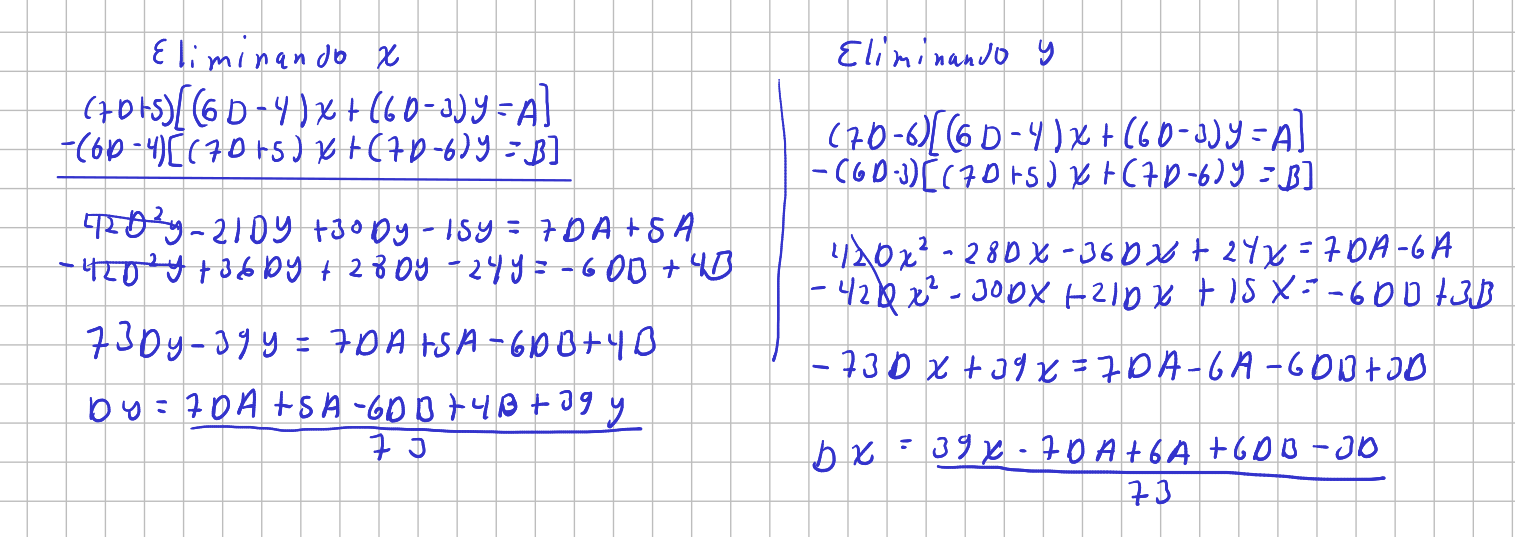

Resuelvo en Python

In [22]:
from sympy import *

# Declaramos las variable a utilizar
x, y, t= symbols("x y t")

h= 1/300

# Ingresamos nuestras funciones A y B
A = (47/2)*cos(t) + (0.5)*sin(t)-(0.5)*exp(t)-2-3*t
B = (77/2)*cos(t) + (47/2)*sin(t)-(11/2)*exp(t)+12-6*t

# Ahora pasamos el despeje de Dx y Dy en dos funcios F y G
f = (6*A - 7*A.diff() + 6*B.diff() + 3*B + 39*x) / 73
g = (7 * A.diff() + 5*A - 6 * B.diff() + 4*B + 39*y) / 73

display(f)
display(g)

-36*t/73 + 39*x/73 - 0.671232876712329*exp(t) + 0.0958904109589041*sin(t) + 5.3972602739726*cos(t) + 9/73

-39*t/73 + 39*y/73 + 0.0684931506849315*exp(t) + 2.23287671232877*sin(t) + 1.83561643835616*cos(t) + 53/73

In [23]:
from numpy import arange
# creamos nuestro intervalo
T = [t for t in arange(start=0, stop=1/60 + h/2,step=h)]
T

[0.0,
 0.0033333333333333335,
 0.006666666666666667,
 0.01,
 0.013333333333333334,
 0.016666666666666666]

In [24]:
# Ahora vamos a generar todas nuestras K y T

# Declaro la lista con x(0) = 2, y(0)=-3

X = [2]
Y = [-3]
K11 = [0]
K12 = [0]
K21 = [0]
K22 = [0]
K31 = [0]
K32 = [0]
K41 = [0]
K42 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k11 = f.subs({t: T[i-1], x: X[i-1]})
    k12 = g.subs({t: T[i-1], y: Y[i-1]})
    k21 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k11*h)/2})
    k22 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k12*h)/2})
    k31 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k21*h)/2})
    k32 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k22*h)/2})
    k41 = f.subs({t: T[i-1] + h, x: X[i-1] + k31*h})
    k42 = g.subs({t: T[i-1] + h, y: Y[i-1] + k32*h})
    K11.append(k11)
    K12.append(k12)
    K21.append(k21)
    K22.append(k22)
    K31.append(k31)
    K32.append(k32)
    K41.append(k41)
    K42.append(k42)
    X.append(float(X[i-1] + (h/6)*(k11+2*k21+2*k31+k41)))
    Y.append(float(Y[i-1] + (h/6)*(k12+2*k22+2*k32+k42)))


display(X)
display(Y)

[2,
 2.019737625020378,
 2.039498322847665,
 2.059281909508037,
 2.0790882006088514,
 2.09891701133985]

[-3,
 -2.9965624790445435,
 -2.993099244479279,
 -2.989610316379518,
 -2.9860957151222243,
 -2.9825554613857608]

In [25]:
# Desplegamos en una tabla los resultados de las aproximaciones y las K
from utils import imprimir_tabla

# Primero una lista para los datos principales
lista_aproximaciones = [["ti", "Yi", "Xi"]]

for i in range(len(T)):
    lista_aproximaciones.append(
        [
            str(float(T[i])),
            str(float(X[i])),
            str(float(Y[i]))
        ]
    )

# Ahora una lista de las K de x
lista_k1 = [["k11", "k21", "k31", "k41"]]

for i in range(len(T)):
    lista_k1.append(
        [
            str(float(K11[i])),
            str(float(K21[i])),
            str(float(K31[i])),
            str(float(K41[i]))
        ]
    )

# Finalmente una lista de las K de y
lista_k2 = [["k12", "k22", "k32", "k42"]]

for i in range(len(T)):
    lista_k2.append(
        [
            str(float(K12[i])),
            str(float(K22[i])),
            str(float(K32[i])),
            str(float(K42[i]))
        ]
    )

print("Tabla de aproximaciones")
imprimir_tabla(lista_aproximaciones)

print("Tabla de k para x")
imprimir_tabla(lista_k1)

print("Tabla de k para y")
imprimir_tabla(lista_k2)

Tabla de aproximaciones


┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ ti                    ┃ Yi                 ┃ Xi                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                   │ 2.0                │ -3.0                │
│ 0.0033333333333333335 │ 2.019737625020378  │ -2.9965624790445435 │
│ 0.006666666666666667  │ 2.039498322847665  │ -2.993099244479279  │
│ 0.01                  │ 2.059281909508037  │ -2.989610316379518  │
│ 0.013333333333333334  │ 2.0790882006088514 │ -2.9860957151222243 │
│ 0.016666666666666666  │ 2.09891701133985   │ -2.9825554613857608 │
└───────────────────────┴────────────────────┴─────────────────────┘

Tabla de k para x


┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k11               ┃ k21                ┃ k31               ┃ k41                ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0               │ 0.0                │ 0.0               │ 0.0                │
│ 5.917808219178081 │ 5.921288249498216  │ 5.921291348155351 │ 5.9247576221951315 │
│ 5.924757615353139 │ 5.928210109083688  │ 5.928213183221941 │ 5.93165188915243   │
│ 5.931651882322915 │ 5.935076776534802  │ 5.935079826098142 │ 5.938490901079899  │
│ 5.938490894262937 │ 5.941888126206564  │ 5.941891151139116 │ 5.945274532512287  │
│ 5.945274525707954 │ 5.9486440328133945 │ 5.948647033059448 │ 5.952002658343936  │
└───────────────────┴────────────────────┴───────────────────┴────────────────────┘

Tabla de k para y


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k12                ┃ k22                ┃ k32                ┃ k42                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 1.0273972602739725 │ 1.031254815525784  │ 1.0312582503352545 │ 1.0351143278258061 │
│ 1.0351143243288092 │ 1.038968903565776  │ 1.0389723357253706 │ 1.0428254145647955 │
│ 1.0428254110634394 │ 1.0466769690294484 │ 1.0466803984988704 │ 1.05053043344981   │
│ 1.0505304299441363 │ 1.0543789214208272 │ 1.0543823481598134 │ 1.0582292940229316 │
│ 1.0582292905129822 │ 1.0620746703202848 │ 1.0620780942886066 │ 1.0659219059031269 │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘